# PHOENIX Final Project

# Import packages

In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sms
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load Data

In [2]:
Telcochurn = pd.read_excel("C:/Users/Dell 1/OneDrive/Documentos/Data Science Final Project/Telco_customer_churn.xlsx")

In [3]:
Telcochurn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Finding independent variable

In [4]:
Telcochurn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [6]:
report(Telcochurn)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


## Our first intention is to resume the data to have a complete picture of it and then be able to select only columns that can help to determine the probability of customers churning.

In [7]:
Telcochurn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
Telcochurn1 = Telcochurn

In [9]:
Telcochurn1.info

<bound method DataFrame.info of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   

In [10]:
Telcochurn1.drop(columns=["CustomerID", "Count", "Lat Long", "Latitude", "Longitude", "Country", "State", "Partner", "Dependents", "Streaming TV", "Streaming Movies", "Paperless Billing"], axis=1, inplace=True)

In [11]:
Telcochurn1.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Contract,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
Telcochurn1.info

<bound method DataFrame.info of               City  Zip Code  Gender Senior Citizen  Tenure Months  \
0      Los Angeles     90003    Male             No              2   
1      Los Angeles     90005  Female             No              2   
2      Los Angeles     90006  Female             No              8   
3      Los Angeles     90010  Female             No             28   
4      Los Angeles     90015    Male             No             49   
...            ...       ...     ...            ...            ...   
7038       Landers     92285  Female             No             72   
7039      Adelanto     92301    Male             No             24   
7040         Amboy     92304  Female             No             72   
7041  Angelus Oaks     92305  Female             No             11   
7042  Apple Valley     92308    Male             No             66   

     Phone Service    Multiple Lines Internet Service      Online Security  \
0              Yes                No             

# How it looks?

array([[<AxesSubplot:title={'center':'Zip Code'}>,
        <AxesSubplot:title={'center':'Tenure Months'}>],
       [<AxesSubplot:title={'center':'Monthly Charges'}>,
        <AxesSubplot:title={'center':'Churn Value'}>],
       [<AxesSubplot:title={'center':'Churn Score'}>,
        <AxesSubplot:title={'center':'CLTV'}>]], dtype=object)

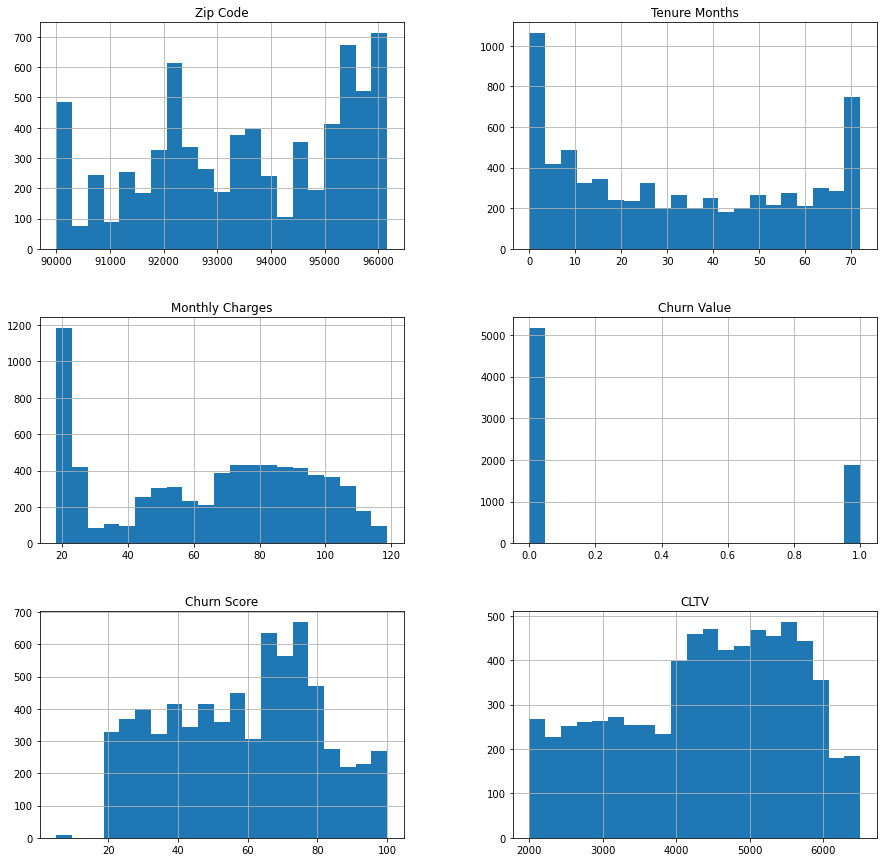

In [13]:
Telcochurn1.hist(bins=21,figsize=(15,15))

In [14]:
stats.ttest_1samp(Telcochurn1['Churn Score'], 6.2)

Ttest_1sampResult(statistic=204.68571542454114, pvalue=0.0)

In [15]:
Telcochurn1['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

<AxesSubplot:>

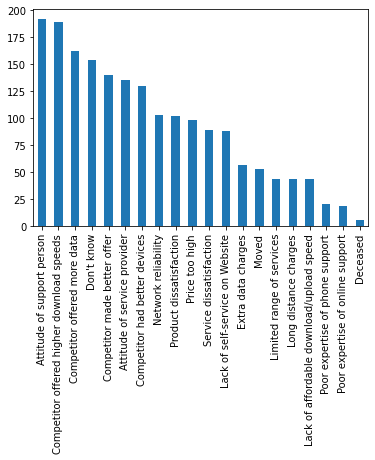

In [16]:
Telcochurn1['Churn Reason'].value_counts().plot(kind='bar')

In [17]:
Telcochurn1['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

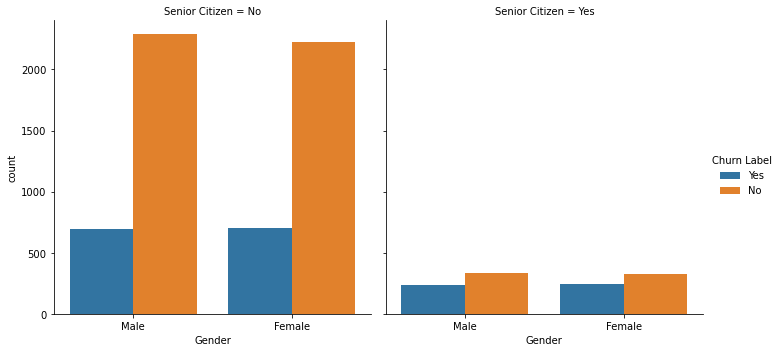

In [18]:
sns.catplot(x='Gender', col='Senior Citizen', hue='Churn Label', kind='count', data=Telcochurn1)

In [19]:
by_gender_senior = Telcochurn1.groupby(['Senior Citizen', 'Gender'])['Churn Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn Label': 'Ratio'}).reset_index().sort_values('Senior Citizen')
by_gender_senior

,Senior Citizen,Gender,Churn Label,Ratio
0,No,Female,No,0.760616
1,No,Female,Yes,0.239384
2,No,Male,No,0.767192
3,No,Male,Yes,0.232808
4,Yes,Female,No,0.577465
5,Yes,Female,Yes,0.422535
6,Yes,Male,No,0.588850
7,Yes,Male,Yes,0.411150


## The visualization above shows that the churn and retain ratio for both male and female senior citizens is almost the same.  We can also appreciate an increase in the churn proportion in this same category of customers.  According to the analysis of nonsenior citizens, of both genders, the churn proportion keeps the balance very similar.


#  Comparing Senior Citizens  retention by Gender according to contract lenght.

In [20]:
Telcochurn2 = Telcochurn1

In [21]:
Telcochurn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Contract           7043 non-null   object 
 13  Payment Method     7043 non-null   object 
 14  Monthly Charges    7043 non-null   float64
 15  Total Charges      7043 non-null   object 
 16  Churn Label        7043 

In [22]:
Telcochurn2.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Contract,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [23]:
by_gender_senior = Telcochurn2.groupby(['Senior Citizen', 'Gender'])['Contract'].value_counts(normalize=True).to_frame().rename(columns={'Contract': 'Contract Length'}).reset_index().sort_values('Senior Citizen')
by_gender_senior

,Senior Citizen,Gender,Contract,Contract Length
0,No,Female,Month-to-month,0.522603
1,No,Female,Two year,0.266096
2,No,Female,One year,0.211301
3,No,Male,Month-to-month,0.517276
4,No,Male,Two year,0.259309
5,No,Male,One year,0.223415
6,Yes,Female,Month-to-month,0.702465
7,Yes,Female,One year,0.177817
8,Yes,Female,Two year,0.119718
9,Yes,Male,Month-to-month,0.710801


In [24]:
Telcochurn2["Contract"].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [25]:
Telcochurn2["Contract"].unique()
array(['Month-to-month', 'Two year', 'One year'], dtype=object)
def ContractR (series):
    if series == "Month-to-month":
        return 0
    if series == "One year":
        return 1
    if series == "Two year":
        return 2
Telcochurn2["ContractR"] = Telcochurn2["Contract"].apply(ContractR)

In [26]:
Telcochurn2.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,ContractR
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,0
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,0
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,0
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,0


In [27]:
Telcochurn2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
Telcochurn2["Gender"].unique()
array(['Male', 'Female'], dtype=object)
def GenderR (series):
    if series == "Male":
        return 0
    if series == "Female":
        return 1
Telcochurn2["GenderR"] = Telcochurn2["Gender"].apply(GenderR)

In [29]:
Telcochurn2.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,ContractR,GenderR
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,0,0
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0,1
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,0,1
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,0,1
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,0,0


In [30]:
x = Telcochurn2['GenderR']
y = Telcochurn2['ContractR']

In [31]:
model = sms.OLS(y,x).fit()

Text(0, 0.5, 'Contract')

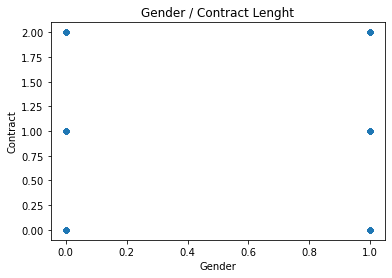

In [32]:
Plot = Telcochurn2.plot.scatter(x='GenderR', y='ContractR')
Plot.set_title("Gender / Contract Lenght")
Plot.set_xlabel("Gender")
Plot.set_ylabel("Contract")

Text(0.5, 1.0, 'Gender & Contract\n ')

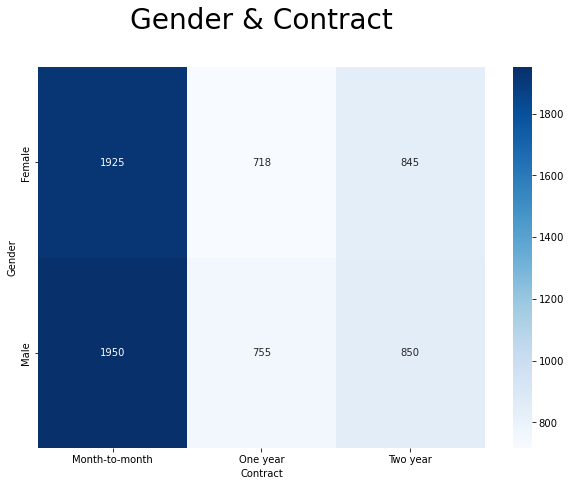

In [33]:
plt.figure(figsize=(10,7),facecolor='white')
sns.heatmap(pd.crosstab(Telcochurn2.Gender,Telcochurn2.Contract),annot=True,fmt="d",cmap="Blues")
plt.title('Gender & Contract\n ',fontsize=28,color='Black')

## Spending average

In [34]:
Telcochurn2['Total Charges']=Telcochurn2['Total Charges'].apply

In [35]:
print(Telcochurn2.isnull().sum())
print('The sum of values is null: ', Telcochurn2.isnull().sum().sum())

City                    0
Zip Code                0
Gender                  0
Senior Citizen          0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Contract                0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
ContractR               0
GenderR                 0
dtype: int64
The sum of values is null:  5174


In [36]:
Telcochurn2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Zip Code,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,ContractR,GenderR
Zip Code,1.0,0.001,-0.0046,0.0033,-0.0028,-0.0036,0.0044,-0.015
Tenure Months,0.001,1.0,0.25,-0.35,-0.22,0.4,0.67,-0.0051
Monthly Charges,-0.0046,0.25,1.0,0.19,0.13,0.099,-0.074,0.015
Churn Value,0.0033,-0.35,0.19,1.0,0.66,-0.13,-0.4,0.0086
Churn Score,-0.0028,-0.22,0.13,0.66,1.0,-0.08,-0.26,-0.00031
CLTV,-0.0036,0.4,0.099,-0.13,-0.08,1.0,0.27,0.0069
ContractR,0.0044,0.67,-0.074,-0.4,-0.26,0.27,1.0,-0.00013
GenderR,-0.015,-0.0051,0.015,0.0086,-0.00031,0.0069,-0.00013,1.0


In [37]:
## Telcochurn2['Total Charges'].value_counts().plot(kind='bar')

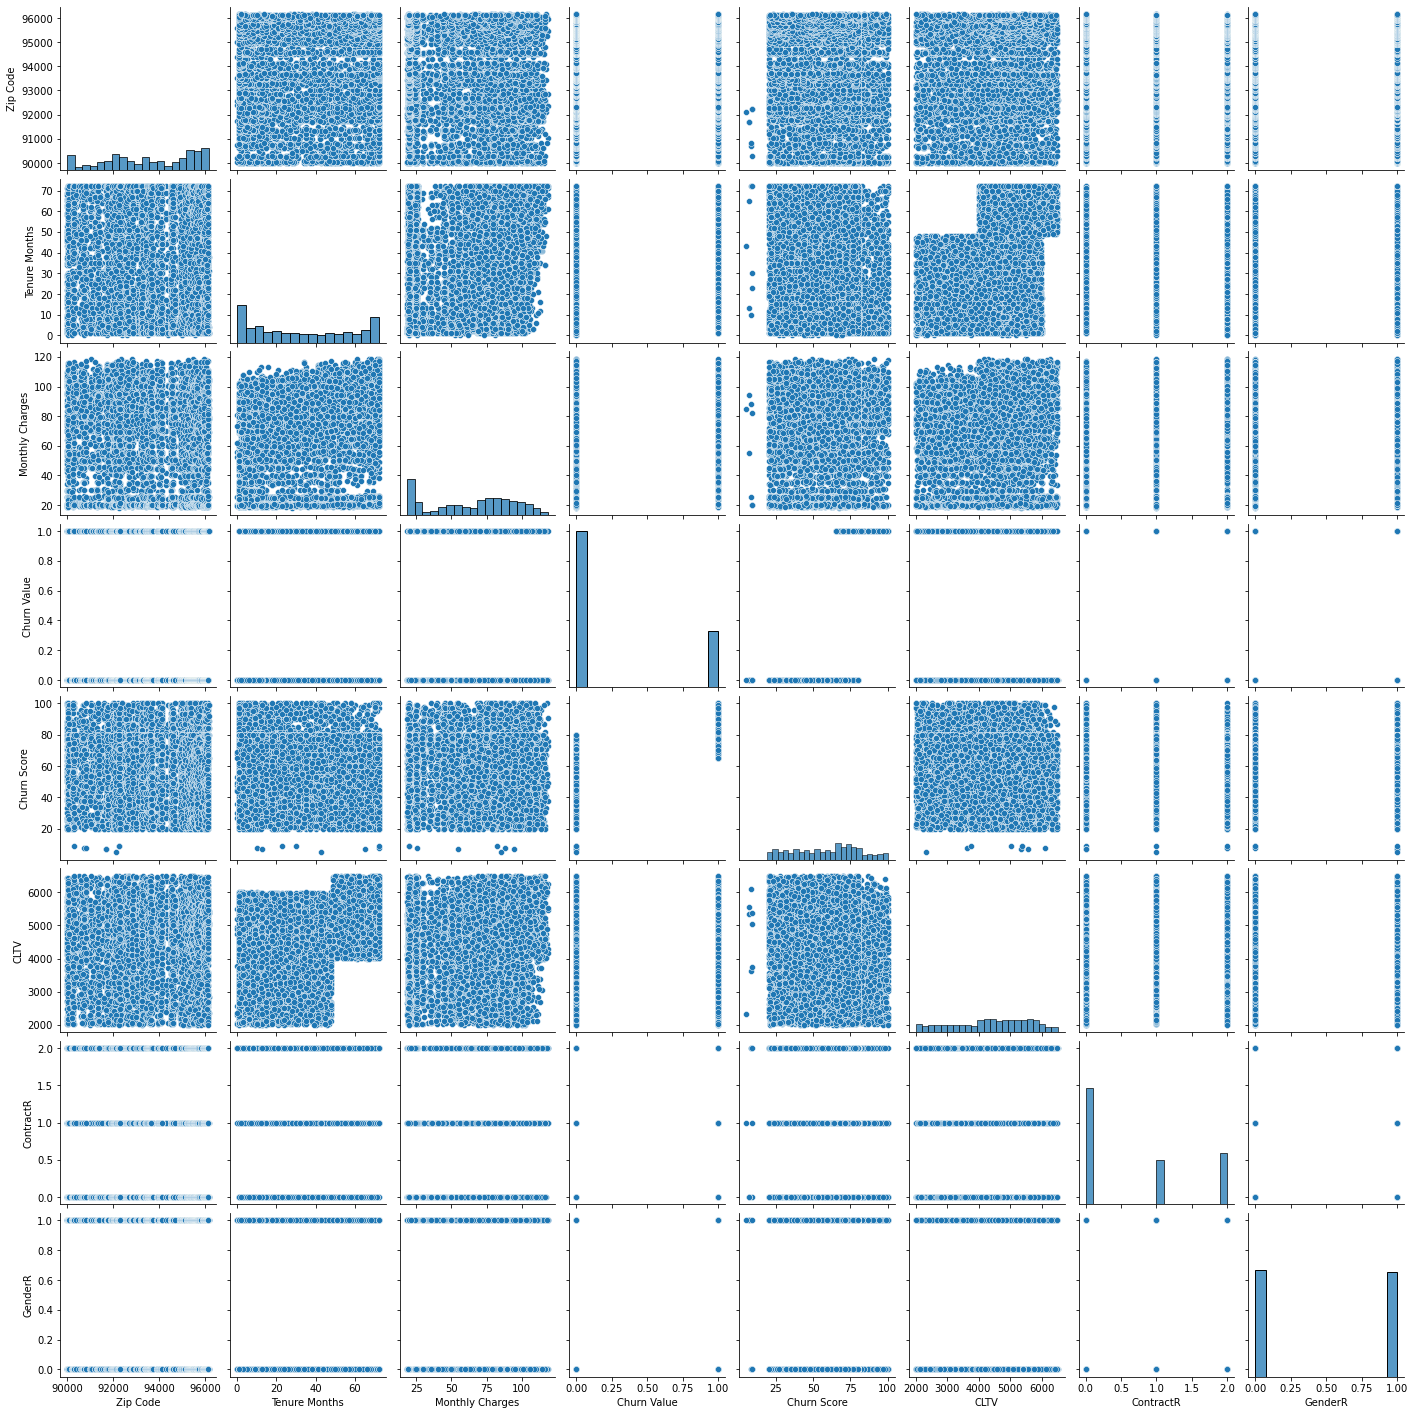

In [38]:
sns.pairplot(Telcochurn2)

In [41]:
model = sms.OLS(y,x).fit()

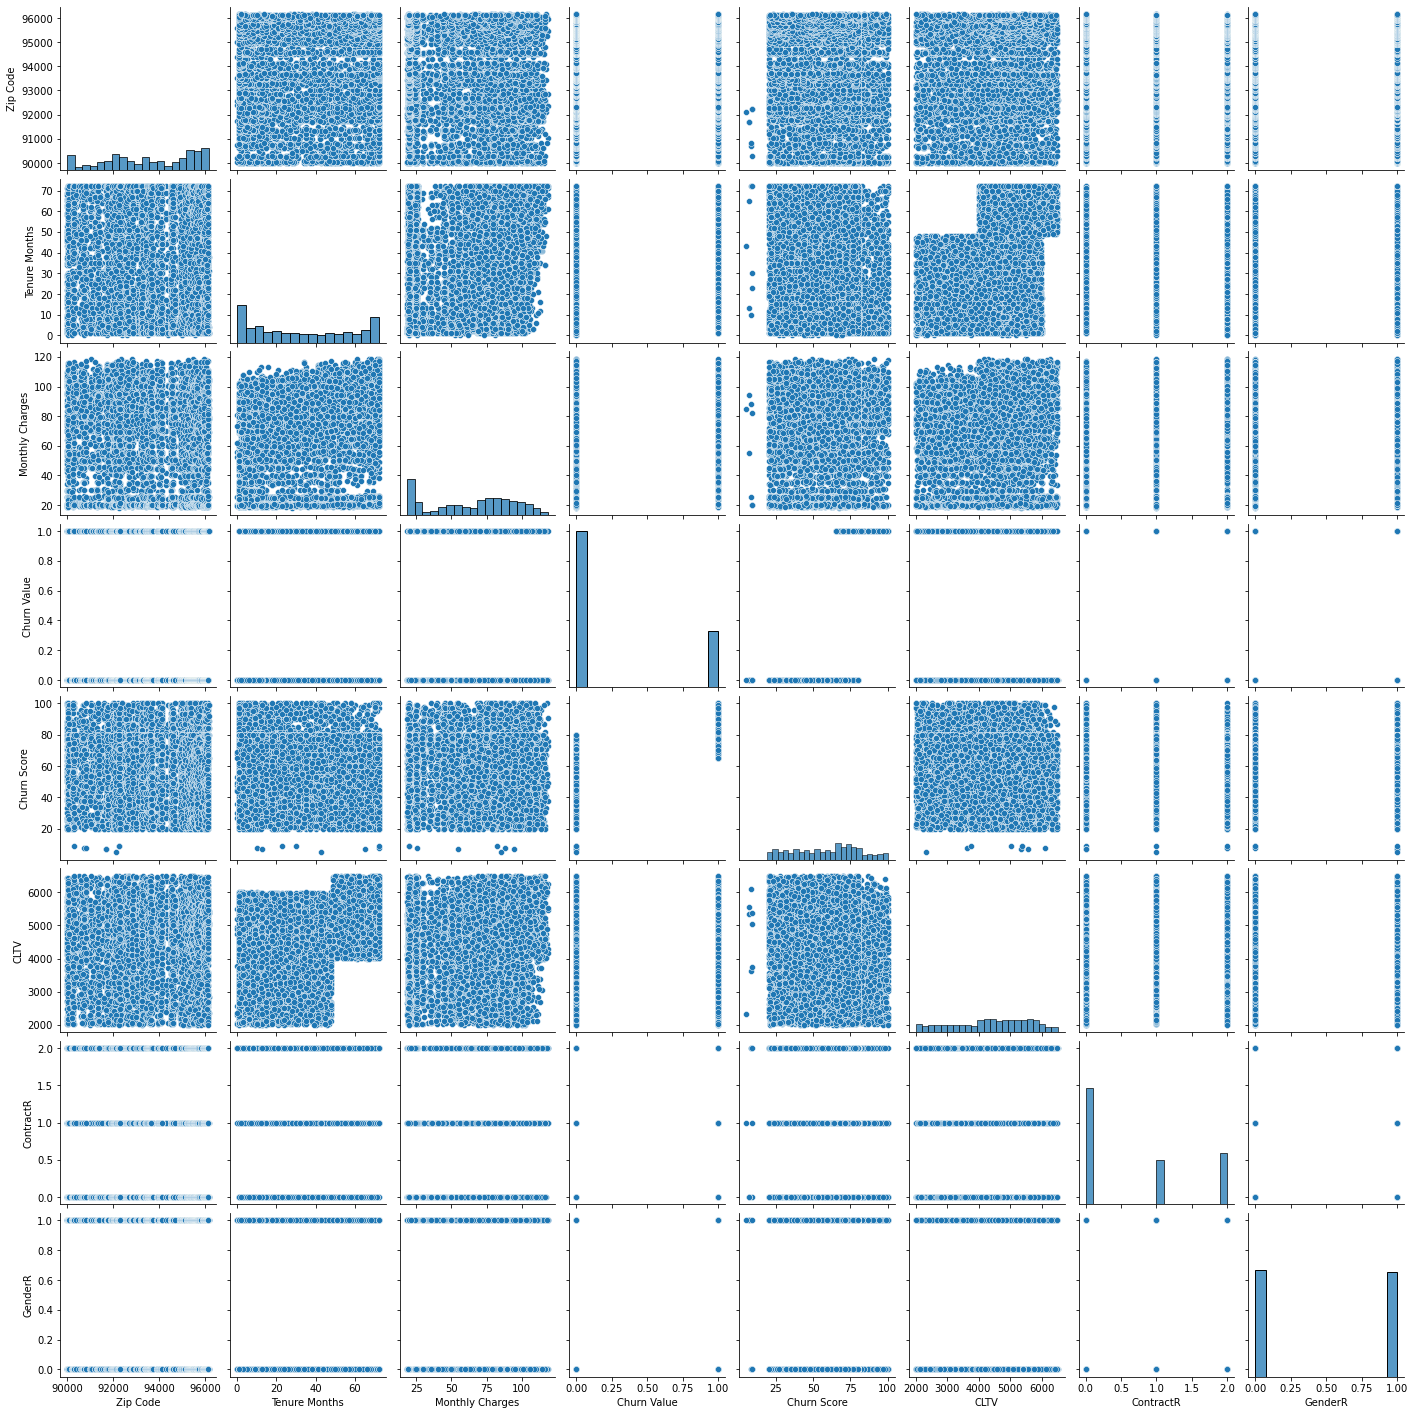

In [42]:
sns.pairplot(Telcochurn2)

In [43]:
pwd()

'C:\\Users\\Dell 1'